In [1]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [2]:
%cd drive/MyDrive/hotdog

/content/drive/MyDrive/hotdog


## File structure
test 
- hot_dog
  - images
- not_hot_dog
  - images

train
- hot_dog
  - images
- not_hot_dog
  - images

In [3]:
%ls test


hot_dog/  not_hot_dog/


# Helper function

In [4]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

# Load in testing and training data

In [5]:

X_train_hot = load_images_from_folder('train/hot_dog')
X_train_not = load_images_from_folder('train/not_hot_dog')
X_test_hot = load_images_from_folder('test/hot_dog')
X_test_not = load_images_from_folder('test/not_hot_dog')


# Functions for scaling images to same size and fixing color


In [6]:
from PIL import Image

# Reduces image quality while preserving dimension
def scale(images):

  return_list = []

  for index, image in enumerate(images):
    im2 = Image.fromarray(images[index].astype('uint8'), 'RGB')
    im2 = im2.resize((256,256))
    im2 = np.array(im2)
    return_list.append(im2)
  return np.array(return_list)

def fix_color(images):
  return np.flip(images, axis=-1) 



# Scale images and fix color

In [7]:
import matplotlib.pyplot as plt
# Scale and fix
X_train_hot = fix_color(scale(X_train_hot))
X_train_not = fix_color(scale(X_train_not))
X_test_hot = fix_color(scale(X_test_hot))
X_test_not = fix_color(scale(X_test_not))


# Create labels and merge data

In [8]:
# y_train
y_train_0 = np.zeros(X_train_not.shape[0])
y_train_1 = np.ones(X_train_not.shape[0])
y_train = np.hstack((y_train_0,y_train_1))

# y_test
y_test_0 = np.zeros(X_test_not.shape[0])
y_test_1 = np.ones(X_test_not.shape[0])
y_test = np.hstack((y_test_0,y_test_1))



# X_train
X_not = np.vstack((X_test_not, X_train_not))
X_hot = np.vstack((X_test_hot, X_train_hot))

y_not = np.zeros(X_not.shape[0])
y_hot = np.ones(X_hot.shape[0])


X = np.vstack((X_not, X_hot))
y = np.hstack((y_not, y_hot))
# Delete redundant variables
#del(y_train_0)
#del(y_train_1)
#del(y_test_0)
#del(y_test_1)
#
#del(X_train_not)
#del(X_test_not)
#del(X_train_hot)
#del(X_test_hot)

# Split into train, test and val

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.5, random_state=42)


(256, 256, 3)


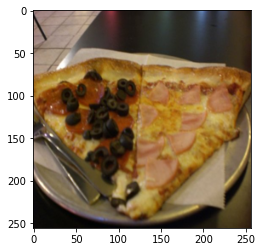

In [10]:
plt.imshow(X_test[0])
print(X_train[0].shape)

# Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from tensorflow.keras.optimizers import Adam
# Define the model
model = Sequential()

# Add the convolutional layers
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(X_train[0].shape)))
model.add(Dropout(0.2))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=5e-3), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 8)       224       
                                                                 
 dropout (Dropout)           (None, 254, 254, 8)       0         
                                                                 
 average_pooling2d (AverageP  (None, 127, 127, 8)      0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      1168      
                                                                 
 dropout_1 (Dropout)         (None, 125, 125, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(499, 256, 256, 3)
(499,)
(798, 256, 256, 3)
(798,)


In [13]:
history = model.fit(X_train,y_train, epochs=30, shuffle=True, validation_data=(X_val, y_val), batch_size= 32)

Epoch 1/30
25/25 [==============================] - 29s 1s/step - loss: 1584.6382 - accuracy: 0.5150 - val_loss: 0.6882 - val_accuracy: 0.5271
Epoch 2/30
25/25 [==============================] - 28s 1s/step - loss: 0.6877 - accuracy: 0.5238 - val_loss: 0.6882 - val_accuracy: 0.5271
Epoch 3/30
25/25 [==============================] - 30s 1s/step - loss: 0.6897 - accuracy: 0.5226 - val_loss: 0.6862 - val_accuracy: 0.5351
Epoch 4/30
25/25 [==============================] - 28s 1s/step - loss: 0.6786 - accuracy: 0.5326 - val_loss: 0.6842 - val_accuracy: 0.5371
Epoch 5/30
25/25 [==============================] - 34s 1s/step - loss: 0.6713 - accuracy: 0.5276 - val_loss: 0.6809 - val_accuracy: 0.5371
Epoch 6/30
25/25 [==============================] - 30s 1s/step - loss: 0.6649 - accuracy: 0.5376 - val_loss: 0.6752 - val_accuracy: 0.5391
Epoch 7/30
25/25 [==============================] - 28s 1s/step - loss: 0.6542 - accuracy: 0.5852 - val_loss: 0.6660 - val_accuracy: 0.5471
Epoch 8/30
25/25 

# Accuracy plot

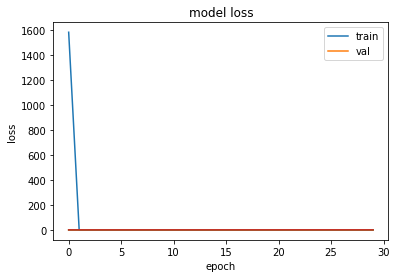

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

#SVM

## Preprocess

In [15]:
X_train_c = np.reshape(X_train, (X_train.shape[0], int(X_train.size/X_train.shape[0])))
X_test_c = np.reshape(X_test, (X_test.shape[0], int(X_test.size/X_test.shape[0])))
X_val_c = np.reshape(X_test, (X_test.shape[0], int(X_test.size/X_test.shape[0])))

## PCA

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


#sns.scatterplot(data=tips, x=X_train_c, y=y, hue="size", palette="deep")


## Model

In [17]:
from sklearn import svm


clf = svm.SVC()
clf.fit(X_train_c, y_train)

print(clf.score(X_train_c,y_train))
print(clf.score(X_test_c,y_test))

0.9172932330827067
0.9098196392785571


# Save model

In [18]:
import pickle

# Save the model to a file
with open('hot_dog_svm.pkl', 'wb') as file:
  pickle.dump(clf, file)

#KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train_c, y_train)

print(neigh.score(X_train_c, y_train))
print(neigh.score(X_test_c, y_test))

0.7694235588972431
0.7595190380761523


# Pickle test



In [20]:
# Load the model from the file
with open('hot_dog_svm.pkl', 'rb') as file:
  loaded_model = pickle.load(file)

In [21]:
loaded_model

SVC()

# Real test

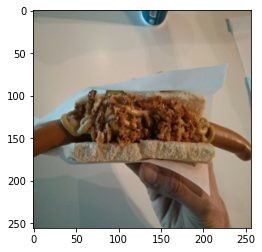

Hot dog


In [22]:

number = 15

plt.imshow(X_test[number])
plt.show()

if loaded_model.predict(X_test_c[number].reshape((1, X_test_c[number].size)))[0] > 0.5:
  print("Hot dog")
else:
  print("Not hot dog")  

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

# create random forest classifier model
rf_model = RandomForestClassifier(n_estimators=17)



# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)

# train the random search meta-estimator to find the best model out of 100 candidates
rf_model.fit(X_train_c, y_train)

print(rf_model.score(X_test_c, y_test))

print(rf_model.get_params())

0.9939879759519038
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 17, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


#Save forest

In [24]:
import joblib as joblib

joblib.dump(rf_model, 'hot_dog_rf.pkl')

['hot_dog_rf.pkl']